# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Introduction

In this worksheet we examine how to solve Ordinary Differential Equations (ODEs) using Python. ODEs are of course central to the study of physics as nearly all our descriptions of nature are formulated, and solved, using ODEs of some sort.

In PX1224 you studied how to solve differential equations using the simple Euler method and the Euler-Cromer method. Revise week 9 and 10 from last year and re-run your code to make sure you understand it. This week introduces you to a powerful method to solve ODEs which is faster and more robust than Euler or Euler-Cromer methods, and is capable of handling more complicated differential equations.

## The scipy library and odeint

The `scipy` library for Python includes many functions for scientific computing and data analysis. The function `odeint` will let us solve numerically one or more _first order_ ODEs using various sophisticated algorithms. It is used to find a solution $y(t)$ to a differential equation:

```python
y = scipy.integrate.odeint(func, y0, t)
```

where `t` is the sequence of time points for which to solve for $y(t)$, and `y` is the returned solution array of the same length. `y0` is the initial value of `y`, and `func` is the name of a function which defines the derivative of `y`.

The full description is available in the online [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), but let's start with a simple example. Take the ODE:

$$
\frac{dy}{dt} = - \lambda y
$$

which has the analytic solution $y = y_0 \exp(−\lambda t)$ as verified by substitution. It describes radioactive decay for example, where $y(t)$ represents the number of undecayed nuclei at a time t.

Let's first set things up, with, say, $y_0=1000$:

In [2]:
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)

# And the initial conditions:
t[0] = 0.0
y0 = 1e3

So, in this case using the `odeint()` function would look like this:

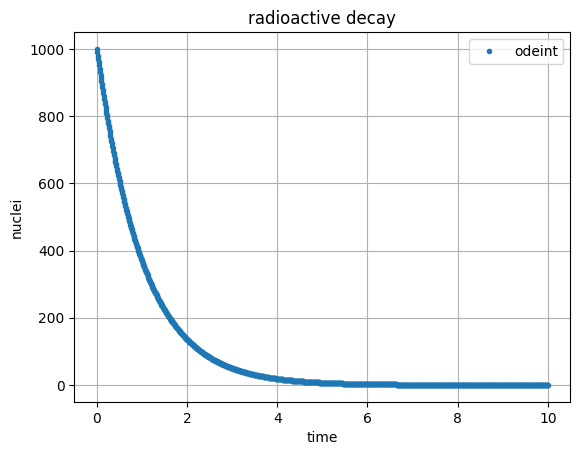

In [3]:
lam = 1.0
def f(y, t): # return derivative(s) of the array y
    return -lam*y

y_odeint = odeint(f, y0, t)

plt.plot(t, y_odeint,'.',label='odeint')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

Let's compare this solution obtained with `odeint()` with the analytical solution:

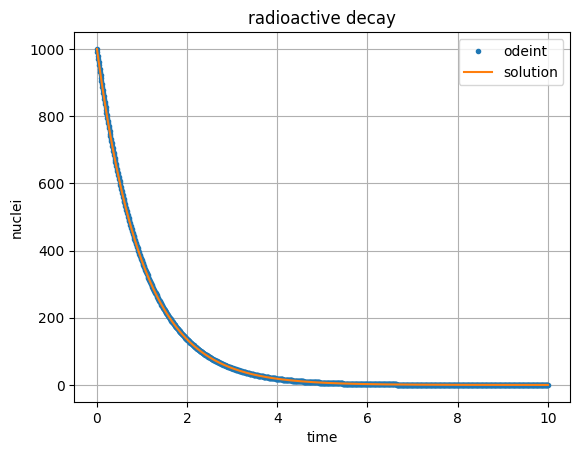

In [4]:
def solution(t): # return the analytic solution
    return y0*np.exp(-lam*t)

plt.plot(t, y_odeint,'.',label='odeint')
plt.plot(t, solution(t),label='solution')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

We can also compare this methods to the Euler method that you used last year:

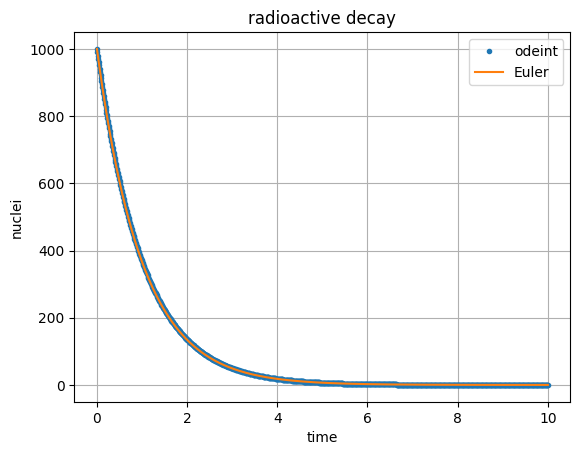

In [5]:
# use Euler's method to integrate equation for radioactive decay
# y_euler is the array for the solution y:
y_euler = np.zeros_like(t)
y_euler[0] = y0

dt = tmax/npts
for i in range(npts -1):
    y_euler[i+1] = y_euler[i] - lam*y_euler[i]*dt

plt.plot(t, y_odeint,'.',label='odeint')
plt.plot(t, y_euler, label='Euler')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

## Improving the function definition

In order to be able to use a different value of $\lambda$ without modifying the function itself each time (that would be a very bad idea) you should modify the function definition and the way it is called like this:

In [6]:
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)

def f(y, t, lam): # return derivative(s) of the array y
    return -lam*y

yinit = 1e3 # initial value
y_odeint = odeint(f, yinit, t, args=(2.0,))

The extra argument to the function needs to be passed to odeint as a “tuple” of values, i.e. a series of values in brackets separated by commas. So $\lambda$ is equal to 2.0 in this example.

## Solving several ODEs at once

The real power of `odeint` lies in the fact that it can solve several ODEs all at once, which can be coupled equations. Since we can transform a second order ODE into two coupled first order ODEs, you can immediately see why this is so useful.

Take the example of the ODE describing the displacement $y$ of a mass on a spring:

$$
m\frac{d^2y}{dt^2} = -ky
$$

Defining $y' = dy/dt$ (which is the velocity of the mass) we can re-write this second order ODE as the two first order ODEs:

$$
\begin{aligned}
\frac{dy}{dt} &= y' \\
\frac{dy'}{dt} &= -\frac{k}{m}y
\end{aligned}
$$

In order to work with these two derivatives, `odeint` needs them as elements of an array, so that `y` is a 2D array:

$$
\begin{aligned}
\frac{dy[0]}{dt} &= y[1] \\
\frac{dy[1]}{dt} &= -\frac{k}{m}y[0]
\end{aligned}
$$

$y[0]$ contains all the "zeroth" derivative as a function of time, and $y[1]$ the first derivatives. We modify the code defining the function and the way that `odeint` is used accordingly:

In [7]:
def f(y, t): # return derivatives of the array y
    k = 10.0
    m = 1.0
    return [ y[1], # the first equation dy[0]/dt
            -(k/m)*y[0] # the second equation dy[1]/dt
           ]

yinit = [0.1, 0] # TWO initial values, y and y'
y = odeint(f, yinit , t)

And y is indeed a 2D array, with the zeroth derivatives in the first column, and the first derivatives in the second column:

In [8]:
print(y)

[[ 0.1         0.        ]
 [ 0.0999499  -0.01000832]
 [ 0.09979967 -0.02000663]
 ...
 [ 0.09897162 -0.0452358 ]
 [ 0.09846931 -0.05511855]
 [ 0.09786833 -0.06494608]]


# Exercises


This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.**. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

[0] Using the radioactive decay differential equation from the start of the worksheet, measure with `curve_fit()` the decay constant $\lambda$ from the (noisy) measurements of Oxygen-22 nuclei as a function of time from the file [ex0.txt](https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt). The starting number of nuclei was `y0=100`.

(this exercise is for demonstration purposes and won't be marked)

**Note**: this is similar to question 4 of exercise 2...


--2025-11-16 15:00:01--  https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2528 (2.5K) [text/plain]
Saving to: ‘ex0.txt.7’

ex0.txt.7           100%[===================>]   2.47K  --.-KB/s    in 0s      

2025-11-16 15:00:01 (33.5 MB/s) - ‘ex0.txt.7’ saved [2528/2528]

Fitted decay constant (lambda): 0.3052 ± 0.0125


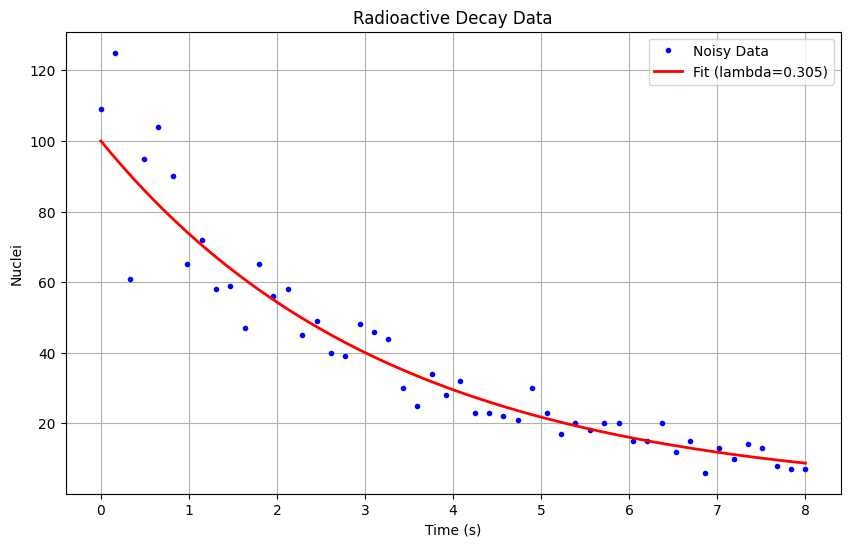

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

! wget https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt

# Load data from the URL.
t_data, y_data = np.loadtxt('ex0.txt', unpack=True)


# Define the derivative function for the ODE
def f_decay(y, t, lam):
    """Returns the derivative dy/dt = -lam*y"""
    return -lam * y

# Define the model function for curve_fit
def model_decay(t, lam):
    """
    Model function for curve_fit.
    Takes t (independent variable) and lam (parameter to fit).
    """
    y0 = 100  # Initial number of nuclei (given in prompt)

    # Solve the ODE for the given time points and lambda
    # We must solve it for every call to this function
    y_solution = odeint(f_decay, y0, t, args=(lam,))

    # odeint returns a 2D array, so we return the first column, flattened
    return y_solution.flatten()

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.plot(t_data, y_data, 'b.', label='Noisy Data')
plt.xlabel('Time (s)')
plt.ylabel('Nuclei')
plt.title('Radioactive Decay Data')

# Perform the curve fit
# Provide an initial guess for lambda
p0_guess = [0.5]
popt, pcov = curve_fit(model_decay, t_data, y_data, p0=p0_guess)

# Extract the fitted parameter
lam_fit = popt[0]

# Get the uncertainty from the covariance matrix
perr = np.sqrt(np.diag(pcov))
lam_err = perr[0]

print(f"Fitted decay constant (lambda): {lam_fit:.4f} \u00b1 {lam_err:.4f}")

# 3. Plot the fitted curve over the data
# Create a smooth time array for plotting the fit
t_fit = np.linspace(min(t_data), max(t_data), 200)
y_fit = model_decay(t_fit, lam_fit)

plt.plot(t_fit, y_fit, 'r-', linewidth=2, label=f'Fit (lambda={lam_fit:.3f})')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 1

 (1). [2] Using the last Python snippet as a guide, solve the ODE for a mass on a spring and plot the result for a suitable range of time.

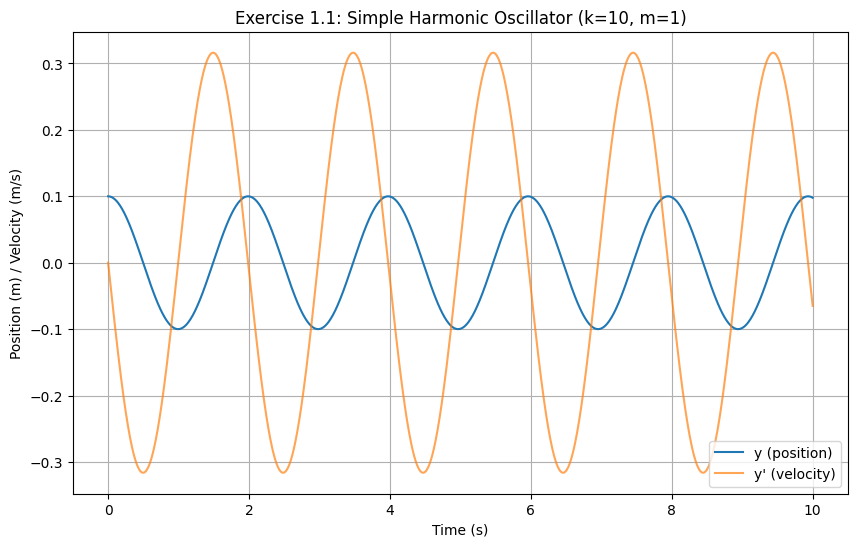

In [16]:
# Define the derivative function (as in the snippet)
def f_sho(y, t):
    """
    Returns derivatives for a simple harmonic oscillator.
    y[0] = position, y[1] = velocity
    """
    k = 10.0
    m = 1.0
    # Returns [dy/dt, dy'/dt]
    return [ y[1],       # dy[0]/dt = y[1] (velocity)
            -(k/m)*y[0] # dy[1]/dt = -(k/m)*y[0] (acceleration)
           ]

# Set up time array (0 to 10s is a suitable range)
t = np.linspace(0.0, 10.0, 1000)

# Initial conditions: [y(0), y'(0)]
# y(0) = 0.1, y'(0) = 0
yinit = [0.1, 0]

# Solve the ODE
y_solution = odeint(f_sho, yinit, t)

# Plot the result (y vs t)
plt.figure(figsize=(10, 6))
plt.plot(t, y_solution[:, 0], label='y (position)')
plt.plot(t, y_solution[:, 1], label="y' (velocity)", alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Velocity (m/s)')
plt.title('Exercise 1.1: Simple Harmonic Oscillator (k=10, m=1)')
plt.legend()
plt.grid(True)
plt.show()

 (2). [3] Modify your code so that the derivatives function accepts the parameters $k$ and $m$ instead of defining them within the function. Plot the results.

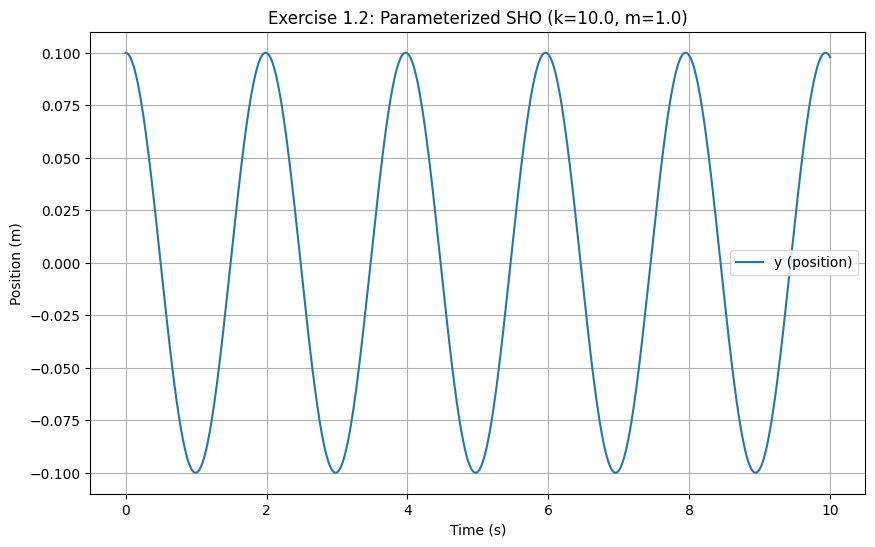

In [17]:
def f_sho_params(y, t, k, m):
    """
    Parameterized derivative function for SHO.
    y[0] = position, y[1] = velocity
    """
    return [ y[1],       # dy/dt
            -(k/m)*y[0] # dy'/dt
           ]

# Set up time array
t = np.linspace(0.0, 10.0, 1000)

# Set initial conditions
yinit = [0.1, 0]

# Set parameters
k_val = 10.0
m_val = 1.0

# Create a tuple for the extra arguments
params = (k_val, m_val)

# Solve the ODE, passing parameters with 'args'
y_solution = odeint(f_sho_params, yinit, t, args=params)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t, y_solution[:, 0], label='y (position)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Exercise 1.2: Parameterized SHO (k={k_val}, m={m_val})')
plt.legend()
plt.grid(True)
plt.show()

 (3). [3] Finally, modify your code, with the above improvements to the function, to solve for the damped mass on a spring:

$$
\begin{aligned}
\frac{dy}{dt} &= y' \\
\frac{dy'}{dt} &= -\frac{k}{m}y -\frac{b}{m}\frac{dy}{dt}
\end{aligned}
$$

Modify your derivatives function to accept the damping parameter $b$ in addition to the parameter $k$ and $m$. Plot the results for $b=0.5$.


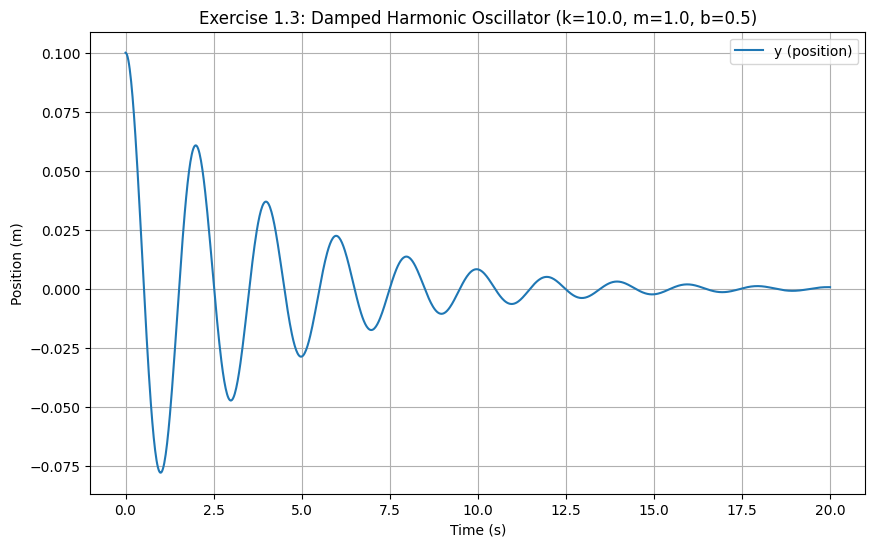

In [18]:
def f_dho(y, t, k, m, b):
    """
    Parameterized derivative function for DAMPED harmonic oscillator.
    y[0] = position, y[1] = velocity
    """
    pos = y[0]
    vel = y[1]

    dy_dt = vel
    dv_dt = -(k/m)*pos - (b/m)*vel # Added damping term

    return [dy_dt, dv_dt]

# Set up time array (longer time to see the damping)
t = np.linspace(0.0, 20.0, 1000)

# Set initial conditions
yinit = [0.1, 0]

# Set parameters
k_val = 10.0
m_val = 1.0
b_val = 0.5 # Given damping parameter

# Create a tuple for the extra arguments
params = (k_val, m_val, b_val)

# Solve the ODE
y_solution = odeint(f_dho, yinit, t, args=params)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t, y_solution[:, 0], label='y (position)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Exercise 1.3: Damped Harmonic Oscillator (k={k_val}, m={m_val}, b={b_val})')
plt.legend()
plt.grid(True)
plt.show()

(4). [5] For the next question, you are trying to measure the spring constant $k$ and the damping parameter $b$ of a spring. You attach a known mass $m$ of 1.0 kg to the spring, move it `y0=0.5` meters from rest, release it at zero speed, and use a detector to measure its displacement as a function of time. Unfortunately this is a measurement done inside a nuclear reactor and there's a lot of noise on the detector... Your measurement is saved in the file [spring_measurement.txt](https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt).

- plot this file, the position of the mass at the end of the spring as a function of time

We will use `curve_fit()` to fit this data, the documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). As a quick summary: `curve_fit()` takes 3 mandatory arguments (the function to fit `func`, the data `x_data` to apply this function to, and the data `y_data` the fitting function will be tweaked to fit), e.g.:
```python
popt,pcov = curve_fit(func,x_data,y_data)
```
The return values are the list of best fit values `popt` and the corresponding covariance matrix `pcov`. The fitting function `func()` **must** have a specific signature: it must take the independent variable as the first argument and the parameters to fit as separate remaining arguments. For instance, it must be possible to have:
```python
y_predicted = func(x_data,some,guess,parameters)
```
And in that case, `y_predicted` would be compared to `y_data` by `curve_fit` to assess wether `[some,guess,parameters]` is a good fit for `y_data`.
`curve_fit` also accepts optional parameters, such as an initial guess `p0` (a list of parameters) for the initial fit parameters. You should always try to plot `y_initial_guess=func(x_data,*p0)`, the prediction of `func` with the inital guess, agains the data `y_data`.

- define a function which takes as input an array of time, and two parameters $k$ and $b$. It should call `odeint()` to solve the damped spring ODE with a fixed mass of 1kg, and return the array of positions corresponding to the array of time for that spring. You will need to define in the function the initial position, initial speed, and the mass. Use the function you defined above.

- call that function with some initial guess $k$ and $b$, and plot that prediction agains the data from `spring_measurement.txt`

- run `curve_fit` with the function you created and give your estimates for the spring constant and damping parameter of the spring. Make a plot if you want to check your answer.

--2025-11-16 15:10:33--  https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25270 (25K) [text/plain]
Saving to: ‘spring_measurement.txt.5’

spring_measurement. 100%[===================>]  24.68K  --.-KB/s    in 0.002s  

2025-11-16 15:10:33 (15.4 MB/s) - ‘spring_measurement.txt.5’ saved [25270/25270]



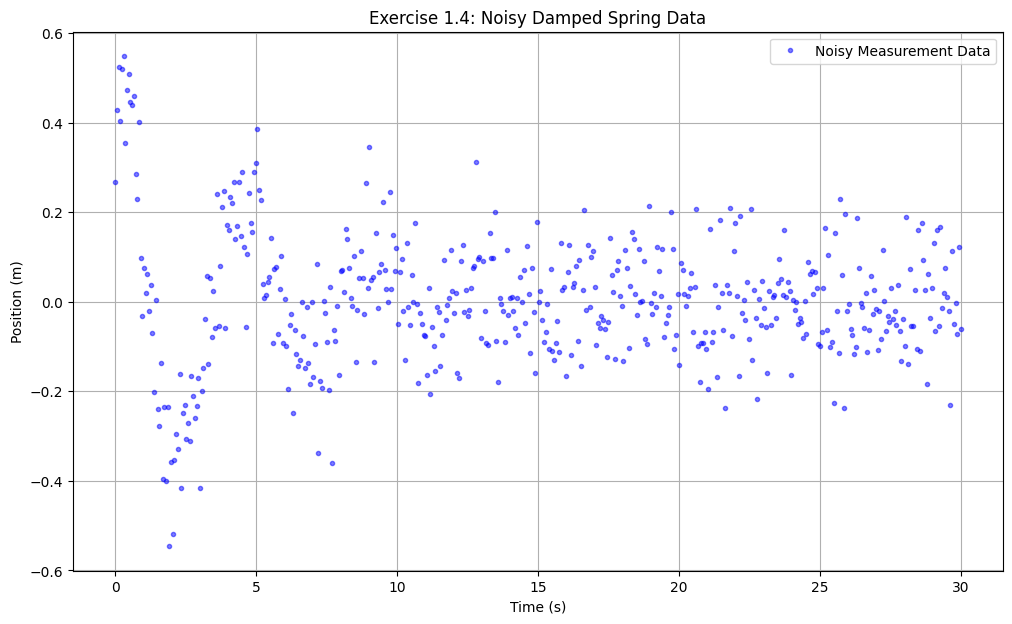

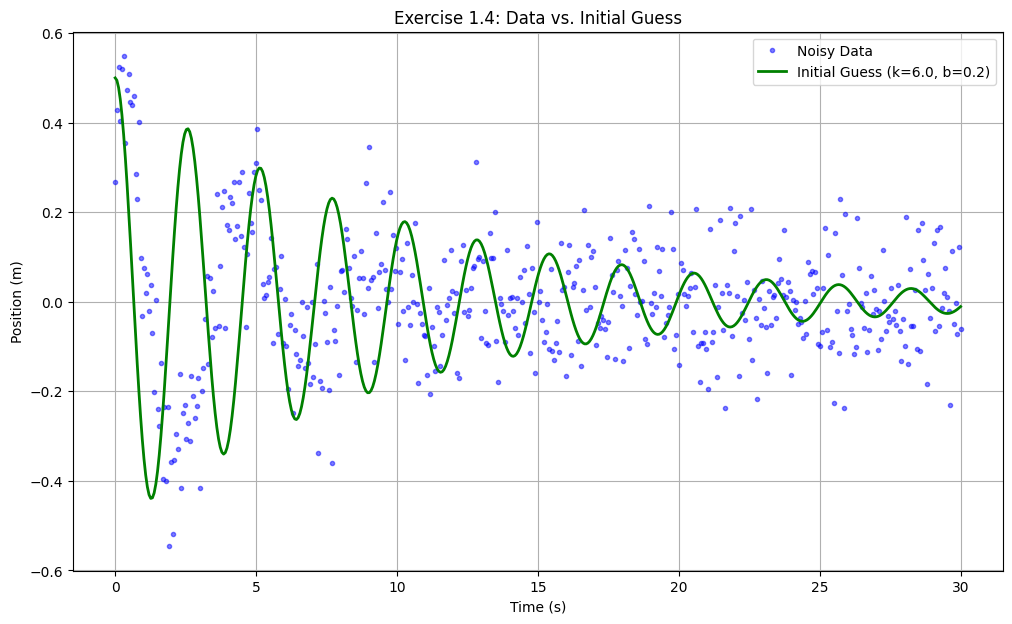

Fitted spring constant (k): 1.9716 ± 0.0317
Fitted damping parameter (b): 0.3790 ± 0.0227


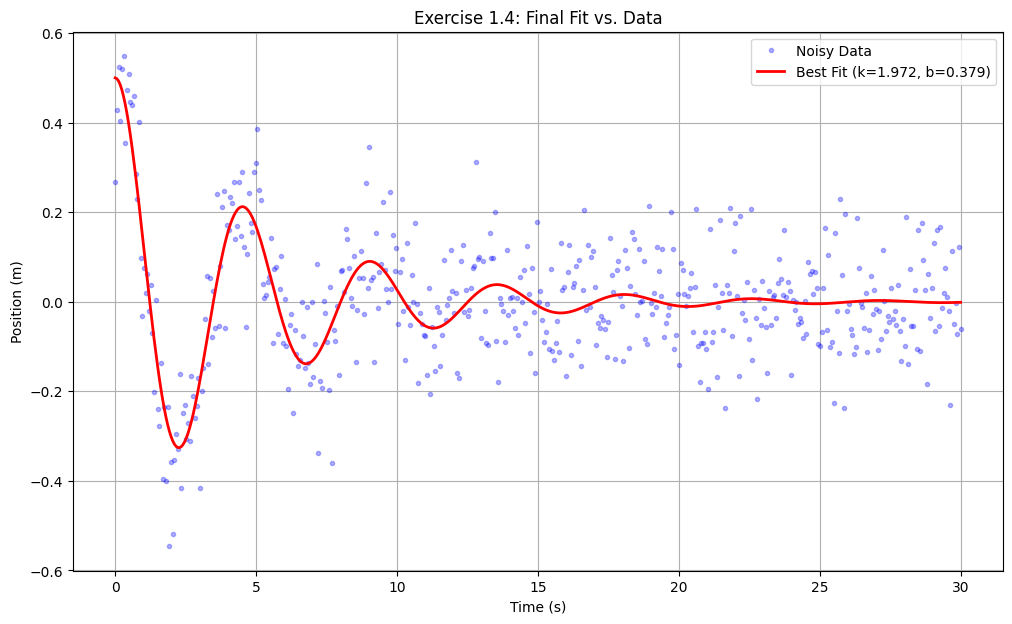

In [25]:
! wget https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt

# Load and plot the data

t_data, y_data = np.loadtxt('spring_measurement.txt', unpack=True)

plt.figure(figsize=(12, 7))
plt.plot(t_data, y_data, 'b.', label='Noisy Measurement Data', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Exercise 1.4: Noisy Damped Spring Data')
plt.legend()
plt.grid(True)
plt.show()

# Define the model function for curve_fit
# We can reuse the f_dho function from 1.3
# def f_dho(y, t, k, m, b): ... (already defined above)

def model_dho_fit(t, k, b):
    """
    Model function for curve_fit.
    Takes t (independent variable) and k, b (parameters to fit).
    """
    # These parameters are fixed by the experiment setup
    m_fixed = 1.0
    yinit_fixed = [0.5, 0.0] # y0=0.5m, v0=0 (from prompt)

    # Create the args tuple for odeint
    params_ode = (k, m_fixed, b)

    # Solve the ODE for the given t_data and parameters k, b
    y_solution = odeint(f_dho, yinit_fixed, t, args=params_ode)

    # Return only the position (first column) to match the length of t
    return y_solution[:, 0]

# Make an initial guess and plot it
# From the data plot, period T is ~2.5s -> omega ~ 2.5 -> k = m*omega^2 ~ 6.25
# Damping looks mild, let's try b=0.2
k_guess = 6.0
b_guess = 0.2
p0 = [k_guess, b_guess]

y_guess = model_dho_fit(t_data, *p0)

plt.figure(figsize=(12, 7))
plt.plot(t_data, y_data, 'b.', label='Noisy Data', alpha=0.5)
plt.plot(t_data, y_guess, 'g-', linewidth=2, label=f'Initial Guess (k={k_guess}, b={b_guess})')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Exercise 1.4: Data vs. Initial Guess')
plt.legend()
plt.grid(True)
plt.show()

# Run curve_fit
popt, pcov = curve_fit(model_dho_fit, t_data, y_data, p0=p0)

# Extract fitted parameters and their errors
k_fit, b_fit = popt
k_err, b_err = np.sqrt(np.diag(pcov))

print(f"Fitted spring constant (k): {k_fit:.4f} \u00b1 {k_err:.4f}")
print(f"Fitted damping parameter (b): {b_fit:.4f} \u00b1 {b_err:.4f}")

# Plot the final fit
# Use a denser time array for a smoother fitted curve for plotting purposes
t_fit = np.linspace(t_data.min(), t_data.max(), 500) # Use the same number of points as t_data for consistency
y_fit = model_dho_fit(t_fit, k_fit, b_fit)

plt.figure(figsize=(12, 7))
plt.plot(t_data, y_data, 'b.', label='Noisy Data', alpha=0.3)
plt.plot(t_fit, y_fit, 'r-', linewidth=2, label=f'Best Fit (k={k_fit:.3f}, b={b_fit:.3f})')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Exercise 1.4: Final Fit vs. Data')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2

[7] The driven van der Pol oscillator obeys the ODE:

$$
\frac{d^2y}{dt^2} - m(1 - y^2) \frac{dy}{dt} + y - A \sin(\omega t) = 0
$$

It is an example of a non-linear oscillator and can show mathematically chaotic behaviour.

Write the equation as two coupled first order ODEs and calculate its behaviour.

Plot graphs of $y$ versus $t$ and $y'$ versus $y$. The latter plot is called a "phase space plot" or "phase portrait".
(**Hint**: pick starting parameter values of $m = 8$, $A = 1$ and $\omega = 0.6$ and vary them to get interesting plots. You will need to pick a suitable range of time.)

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-629501558.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f'Van der Pol Oscillator (y vs t)\n(m={m_val}, A={A_val}, $\omega$={omega_val})')
/tmp/ipython-input-629501558.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f"Van der Pol Phase Space Plot (y' vs y)\n(m={m_val}, A={A_val}, $\omega$={omega_val})")


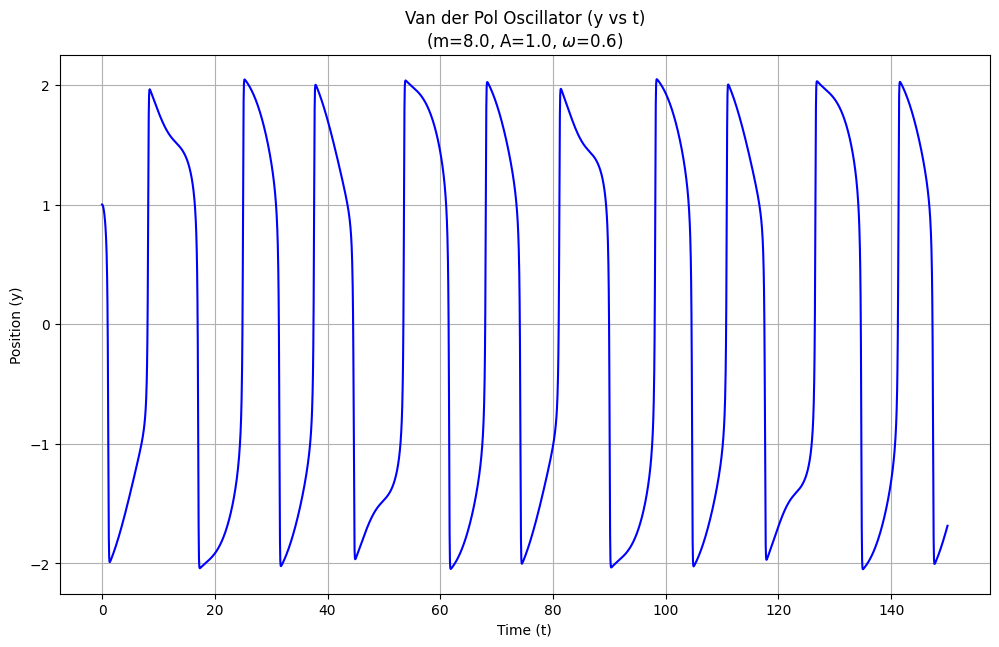

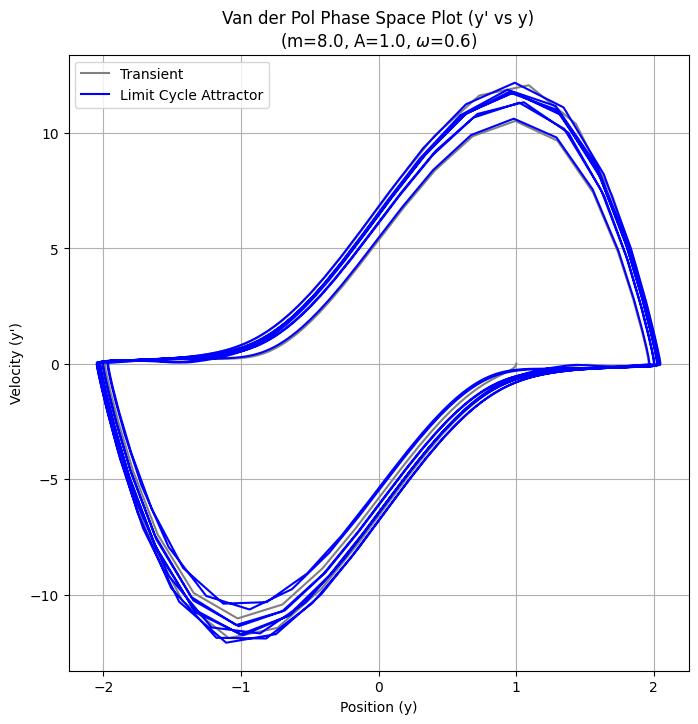

In [26]:
def f_vdp(y, t, m, A, omega):
    """
    Derivative function for the driven van der Pol oscillator.
    y[0] = position (y)
    y[1] = velocity (y')
    """
    y0 = y[0]
    y1 = y[1]

    # dy0/dt = y1
    dy0_dt = y1

    # dy1/dt = m*(1 - y0^2)*y1 - y0 + A*sin(omega*t)
    dy1_dt = m * (1 - y0**2) * y1 - y0 + A * np.sin(omega * t)

    return [dy0_dt, dy1_dt]

# Set parameters
m_val = 8.0
A_val = 1.0
omega_val = 0.6
params = (m_val, A_val, omega_val)

# Set initial conditions (e.g., at rest at y=1)
yinit = [1.0, 0.0]

# Set up time array. Non-linear systems need time
# to settle onto their "attractor". We run for a long time.
t = np.linspace(0, 150, 5000)

# Solve the ODE

solution = odeint(f_vdp, yinit, t, args=params)

# Extract position (y) and velocity (y')
y_pos = solution[:, 0]
y_vel = solution[:, 1]

# Plot 1: y versus t
plt.figure(figsize=(12, 7))
plt.plot(t, y_pos, 'b-')
plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.title(f'Van der Pol Oscillator (y vs t)\n(m={m_val}, A={A_val}, $\omega$={omega_val})')
plt.grid(True)
plt.show()

# Plot 2: Phase Space Plot (y' versus y)
# We'll discard the initial transient part to see the "limit cycle"
# We can find this index by seeing where t > ~30s
transient_time = 30
transient_index = np.where(t > transient_time)[0][0]

plt.figure(figsize=(8, 8))
# Plot the transient path
plt.plot(y_pos[:transient_index], y_vel[:transient_index], 'gray', label='Transient')
# Plot the "attractor"
plt.plot(y_pos[transient_index:], y_vel[transient_index:], 'b-', label='Limit Cycle Attractor')

plt.xlabel('Position (y)')
plt.ylabel("Velocity (y')")
plt.title(f"Van der Pol Phase Space Plot (y' vs y)\n(m={m_val}, A={A_val}, $\omega$={omega_val})")
plt.legend()
plt.grid(True)
plt.show()